In [2]:
import pandas as pd
import numpy as np
import spacy


In [3]:
from google.colab import drive

drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [4]:
DS1=pd.read_csv('/content/gDrive/My Drive/Colab/Dissertation/training.1600000.processed.noemoticon.csv',encoding='latin1',header=None)

In [5]:
DS1.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Exploratory Data Analysis

In [6]:
DS1.shape

(1600000, 6)

In [7]:
DS1=DS1[[5,0]]
DS1.columns=['tweets','sentiment']

In [8]:
DS1.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [9]:
DS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   tweets     1600000 non-null  object
 1   sentiment  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [10]:
DS1['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [11]:
sent_map={0:'Negative sentiment',4:'Positive sentiment'}

In [12]:
import warnings
warnings.filterwarnings('ignore')

Check the word count

In [13]:
x='this project is the research project now'
len(x.split())

7

In [14]:
DS1['tweets'][3]

'my whole body feels itchy and like its on fire '

In [15]:
DS1['word_counts']=DS1['tweets'].apply(lambda x: len(str(x).split()) )
DS1.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


Character Count 

In [16]:
DS1['tweets'][4]

"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

In [17]:
DS1['chars_count']=DS1['tweets'].apply(lambda x: len(x))
DS1.head()

,tweets,sentiment,word_counts,chars_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


Average word count

In [18]:
def avg_word(x):
    a=len(''.join(x.split()))
    b=len(x.split())
    return a/b

In [19]:
DS1['avg_word']=DS1['tweets'].apply(lambda x: avg_word(x))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


Stop Words Count

In [20]:
print(STOP_WORDS)

{'move', 'empty', 'a', 'it', 'whole', 'too', 'hereby', 'bottom', 'did', 'anyone', 'here', 'over', 'whatever', 'be', 'though', 'via', 'during', 'mostly', 'another', 'themselves', 'but', 'afterwards', 'please', 'various', "n't", 'was', 'is', 'or', 'mine', 'onto', 'without', 'if', 'again', 'two', 'yet', 'my', "'re", 'of', 'make', 'out', 'even', '’d', 'them', 'hers', 'back', 'using', 'less', '‘m', 'within', 'whence', 'whose', 'only', 'anything', 'have', 'elsewhere', 'meanwhile', 'to', 'per', 'anyway', 'where', 'latter', 'everywhere', 'hereupon', 'perhaps', 'amount', 'once', 'more', 'however', 'before', 'does', 'because', 'becomes', 'became', 'n‘t', 'in', 'say', 'enough', 'keep', 'until', 'whereafter', "'ll", 'now', 'three', 'ours', 'becoming', 'me', '‘s', 'further', 'beside', 'from', 'our', 'against', 'seeming', 'last', 'six', 'someone', 'there', "'s", 'an', 'itself', 'fifteen', 'between', 'among', 'so', 'latterly', 'after', 'what', 'else', 'under', 'see', 'take', 'namely', 'every', 'the',

In [21]:
DS1['stop_words_count']=DS1['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


Count HashTags and @Mentions


In [22]:
DS1['hash_counts']=DS1['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0


In [23]:
DS1[DS1['hash_counts']==1]

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts
83,@markhardy1974 Me too #itm,0,4,27,5.750000,1,1
175,@machineplay I'm so sorry you're having to go ...,0,12,80,5.666667,4,1
190,"I activated my Selfcontrol block early, meanin...",0,23,136,4.913043,7,1
331,My man crush Jake Peavy let me down #gayforpeavy,0,9,49,4.444444,2,1
368,Wow. The most depressing thing in the world is...,0,21,111,4.285714,9,1
...,...,...,...,...,...,...,...
1599898,"#haveyouever been alone at night, thought you ...",4,21,122,4.809524,10,1
1599937,"@siahoney I am good thanks! How is #Eric, I...",4,25,138,4.400000,8,1
1599952,#Traveltuesday @GuyNGirlTravels Because their ...,4,12,99,7.250000,3,1
1599988,@Roy_Everitt ha- good job. that's right - we g...,4,22,125,4.681818,5,1


In [24]:
DS1['mentions_count']=DS1['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


If numeric digits present in tweets

In [25]:
DS1['numeric_count']=DS1['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


In [26]:
DS1['numeric_count'][101]

1

Upper case Word Count

In [27]:
DS1['upper_count']=DS1['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper()]))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [28]:
DS1['upper_count'][96]

13

###Preprocessing and cleaning
converting text to lower case

In [29]:
DS1['tweets']=DS1['tweets'].apply(lambda x: x.lower())
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [30]:
DS1['tweets'][96]

"so rylee,grace...wana go steve's party or not?? sadly since its easter i wnt b able 2 do much  but ohh well....."

In [31]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i had",
"i'd've": "i would have",
"i'll": "i shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "wwhat is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [32]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [33]:
DS1['tweets'][190]

"i activated my selfcontrol block early, meaning i can't check out the new qc.  regularizing my internal clock is might be difficult. #fb"

In [34]:
DS1['tweets']=DS1['tweets'].apply(lambda x: cont_to_exp(x))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


In [35]:
DS1['tweets'][190]

'i activated my selfcontrol block early, meaning i cannot check out the new qc.  regularizing my internal clock is might be difficult. #fb'

### Count and remove emails from tweet

In [36]:
import re
DS1['emails_count']=DS1['tweets'].apply(lambda x: len(re.findall(r'([a-zA-Z0-9+_-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x)))
DS1.head() 

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0


In [37]:
DS1[DS1['emails_count']==2]

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count
532187,@lorrainestanick hey! i wanted the cherish lip...,0,17,138,7.117647,6,0,1,0,0,2
1108850,"@hitekfame i am not on the computer, but if u...",4,16,119,6.437500,9,0,1,0,0,2
1244943,"@tcthurhappyhour yes yes yes, sign me up! inf...",4,15,133,7.800000,2,0,1,0,2,2


In [38]:
DS1['tweets'][532187]

'@lorrainestanick hey! i wanted the cherish lipstick, but the email never showed  try cmc2418@truman.edu instead of tinacummings@charter.ne'

In [39]:
DS1['tweets']=DS1['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+_-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','',x))
DS1.head() 

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0


In [40]:
DS1['tweets'][532187]

'@lorrainestanick hey! i wanted the cherish lipstick, but the email never showed  try  instead of '

###Remove urls from tweets and count it. 

In [41]:
DS1['urls_flag']=DS1['tweets'].apply(lambda x:len(re.findall(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',x)))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0


In [42]:
#removing urls
DS1['tweets']=DS1['tweets'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "",x))

DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0


### Remove RT

0 denotes negative polarity and 4 denotes positive polarity

In [43]:
DS1['rt_count']=DS1['tweets'].apply(lambda x:len(re.findall('RT',x)))

In [44]:
DS1[DS1['rt_count']==0]

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,just woke up. having no school is the best fee...,4,11,56,4.090909,4,0,0,0,0,0,0,0
1599996,thewdb.com - very cool to hear old walt interv...,4,11,78,6.090909,1,0,0,0,0,0,1,0
1599997,are you ready for your mojo makeover? ask me f...,4,11,57,4.181818,5,0,0,0,0,0,0,0
1599998,happy 38th birthday to my boo of alll time!!! ...,4,12,65,4.416667,3,0,0,0,0,0,0,0


In [45]:
DS1['tweets']=DS1['tweets'].apply(lambda x: re.sub('RT','',x))
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0,0


###Removing punctuations 

In [46]:
DS1['tweets']=DS1['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+','',x))

In [47]:
DS1['tweets'][0]

'switchfoot  - awww that is a bummer  you shoulda got david carr of third day to do it d'

### Removing extra spaces

In [48]:
DS1['tweets']=DS1['tweets'].apply(lambda x: ' '.join(x.split()))

In [49]:
DS1['tweets'][0]

'switchfoot - awww that is a bummer you shoulda got david carr of third day to do it d'

In [50]:
DS1['tweets'][532187]

'lorrainestanick hey i wanted the cherish lipstick but the email never showed try instead of'

### Remove HTML tags

In [51]:
DS1['tweets']=DS1['tweets'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

### Remove Accented characters

In [52]:
import unicodedata
def remove_acc_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [53]:
DS1['tweets']=DS1['tweets'].apply(lambda x: remove_acc_chars(x))

### Remove stop words

In [54]:
DS1['tweets'][0]

'switchfoot - awww that is a bummer you shoulda got david carr of third day to do it d'

In [55]:
DS1['tweets']=DS1['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

In [56]:
df0=DS1[DS1['sentiment']==0].sample(3500)
df4=DS1[DS1['sentiment']==4].sample(3500)

In [57]:
datafr=df0.append(df4)
datafr.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
716096,wesleysouzas 4 ainda,0,3,22,6.333333,0,0,1,1,0,0,0,0
308340,29 degrees thursday hot damn come starbucks ra...,0,15,94,5.266667,4,0,1,1,0,0,0,0
253092,wish dwight magic,0,10,45,3.500000,6,0,0,0,1,0,0,0
505913,love bachelorette makes eyeballs hurt watching...,0,25,124,3.960000,10,0,0,1,1,0,0,0
452316,playing guitar porch angie making fun,0,12,64,4.250000,5,0,0,0,0,0,0,0


In [58]:
datafr.shape

(7000, 13)

In [59]:
datafr=datafr.reset_index(drop=True)

In [60]:
datafr.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,wesleysouzas 4 ainda,0,3,22,6.333333,0,0,1,1,0,0,0,0
1,29 degrees thursday hot damn come starbucks ra...,0,15,94,5.266667,4,0,1,1,0,0,0,0
2,wish dwight magic,0,10,45,3.500000,6,0,0,0,1,0,0,0
3,love bachelorette makes eyeballs hurt watching...,0,25,124,3.960000,10,0,0,1,1,0,0,0
4,playing guitar porch angie making fun,0,12,64,4.250000,5,0,0,0,0,0,0,0


In [61]:
datafr.tail()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
6995,saulcolt oh wait think missunderstood know wor...,4,25,124,3.960000,13,0,1,0,2,0,0,0
6996,followfriday franchiseking ilikefranchiseking,4,4,58,13.500000,1,2,1,0,0,0,0,0
6997,donnad2009 nooo love,4,5,29,4.800000,0,0,1,0,1,0,0,0
6998,readin seventeen mag,4,3,21,6.000000,0,0,0,0,0,0,0,0
6999,ginaodean thanks safe sound settling nicely,4,14,83,4.928571,4,0,1,0,0,0,0,0


In [62]:
datafr_copy=datafr.copy()

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [63]:
nlp=spacy.load('en_core_web_sm')

def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    
    for token in doc:
        lemma=str(token.lemma_)
        if lemma=='-PRON-' or lemma=='be':
            lemma=token.text
        x_list.append(lemma)
        
    print(' '.join(x_list))

In [ ]:
%%time
t=datafr['tweets'].apply(lambda x: make_to_base(x))

wesleysouzas 4 ainda
29 degree thursday hot damn come starbuck rayretaliation right
wish dwight magic
love bachelorette make eyeball hurt watch 2 hr - way long - w fastforward
play guitar porch angie make fun
realize splinter past age 9 hurrrt
happy husband helpful family bum spending mutual day forever
ah bad day hella miss
curlsoutloud till monday fly europe evan
math sat tomorrowand need revise
nataliagordillo wish stay night
way work rain
go come male sign little one day depress nowdamn duck
lesleym dull rainy
1 - 1875 aion beta sit little easy
morganpressel haaaa idea go to bed good nite
yonaa agree tentunya copywriter gue jg pernah usul yang mirip tapi ya client berkata lain
go see quotupquot 3d friday night baby friend sad movie funny
learn school boriing
starmoe yeah make cry
idea wtf tonight
go home tomorrow rain work
burn
rrrraaay gow wildy amp yes sister walk lmao have phone suck hella
keithcumsonu get painful beautiful memory song 2 guy
maxchan have migraine today stop slee

### Remove common words

In [ ]:
text=' '.join(datafr['tweets'])

In [ ]:
text

In [ ]:
text=text.split()
text

In [ ]:
freq_comm=pd.Series(text).value_counts()
freq_comm

In [ ]:
f25=freq_comm[:25]
f25

In [ ]:
datafr=datafr_copy.copy()
datafr

In [ ]:
datafr['tweets']=datafr['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f25]))


### Hardly ( Rare) used words removal

In [ ]:
rare25=freq_comm[-25:]
rare25

In [ ]:
datafr['tweets']=datafr['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare25]))

#Word cloud visualization

In [ ]:
import wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
x=' '.join(text[:25000])

In [ ]:
len(x)

161687

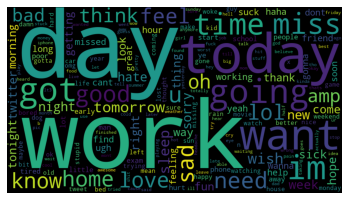

In [ ]:
wc=WordCloud(width=900,height=500).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
DS1.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,0,1,0
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,0,0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,0,0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,0,0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,0,0,0


In [ ]:
DS1_new = DS1.drop(['word_counts', 'chars_count', 'avg_word', 'stop_words_count', 'hash_counts', 'mentions_count', 'numeric_count', 'upper_count','emails_count', 'urls_flag','rt_count'], axis=1)

In [ ]:
DS1_new.head()

,tweets,sentiment
0,switchfoot - awww bummer shoulda got david car...,0
1,upset update facebook texting cry result schoo...,0
2,kenichan dived times ball managed save 50 rest...,0
3,body feels itchy like fire,0
4,nationwideclass behaving mad,0


# Importing new libraries for Analysis 


In [ ]:
import re
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

# plotting
import seaborn as sns
from wordcloud import WordCloud

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#downloading nltk library for different codes
!pip install nltk

import nltk
nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Sentiment analysis 2
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.

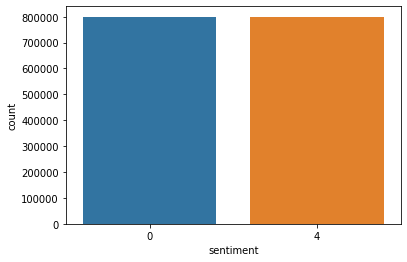

In [ ]:
import seaborn as sns
sns.countplot(x="sentiment", data=DS1_new)

In [ ]:
DS1_new[['tweets','sentiment']].sample(10)

,tweets,sentiment
1518905,happened team carlisle everybody follow peterf...,4
1178711,dont think r u find lov day dnt b sad ur gorgo...,4
322322,wear black work boiling people answering phone...,0
466469,tiiiiiiiiiiired,0
1036840,cleveland survive day wilderness,4
1351074,lalavazquez exactly inquiring,4
1538153,woke feelin goooood haha,4
334189,lake day fun kat angela hilorie greg fried,0
1359504,clevelanddiva lol good plan 8pm early start,4
801664,twittering uni,4


In [ ]:
DS1_new = DS1_new[['tweets','sentiment']]
DS1_new.describe()

,sentiment
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [ ]:
DS1_new['length'] = DS1_new['tweets'].apply(len)

In [ ]:
DS1_new[DS1_new['length'] == 74]['tweets'].iloc[0]

'pray ex threatening start sh myour babies 1st birthday party jerk headache'

In [ ]:
DS1_new[DS1_new['length'] == 6]['tweets'].iloc[0]

'sucked'

In [ ]:
DS1_new[DS1_new['length'] == 70]['tweets'].iloc[0]

'andywana sure pos want dont think trade away company assets sorry andy'

In [ ]:
sentences = DS1_new['tweets'].tolist()
sentences_string = " ".join(sentences)

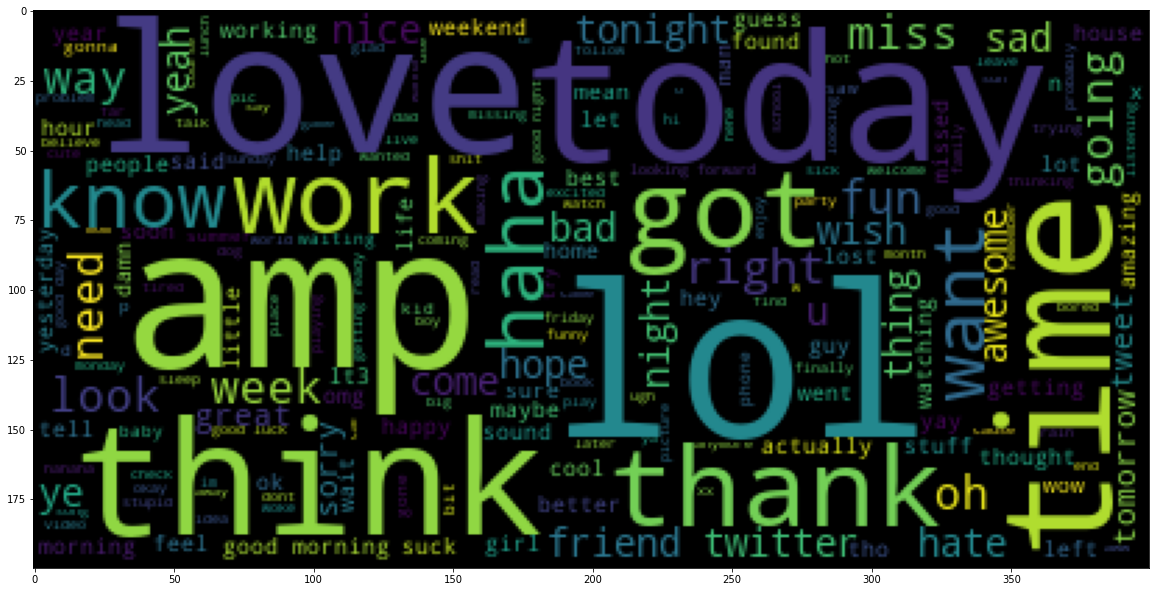

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

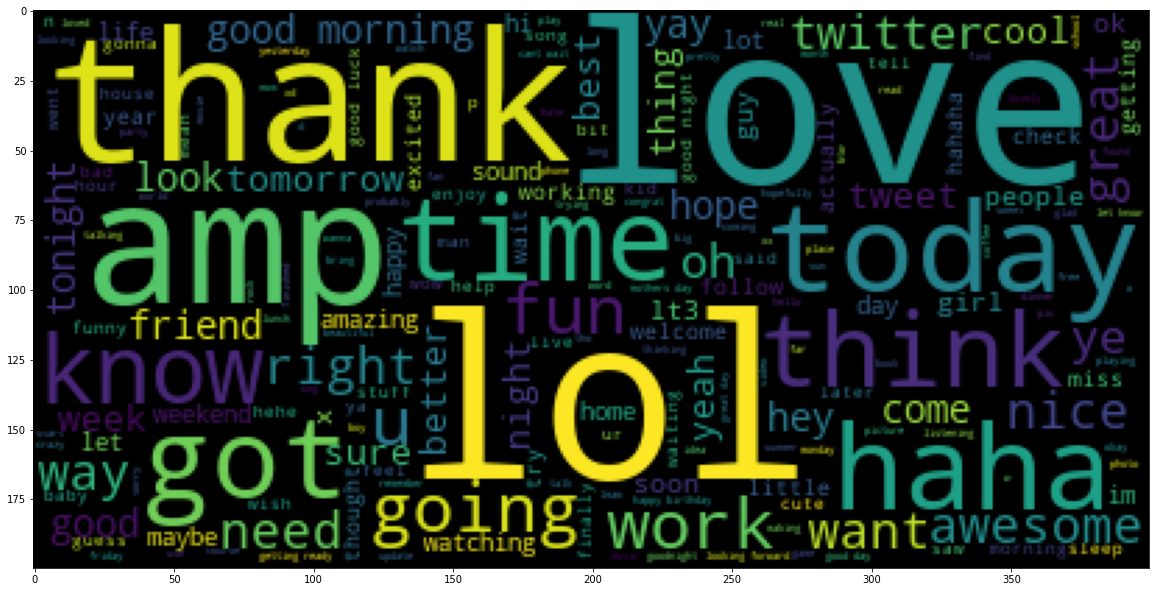

In [ ]:
sentences = DS1_new[DS1_new['sentiment'] == 4]['tweets'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

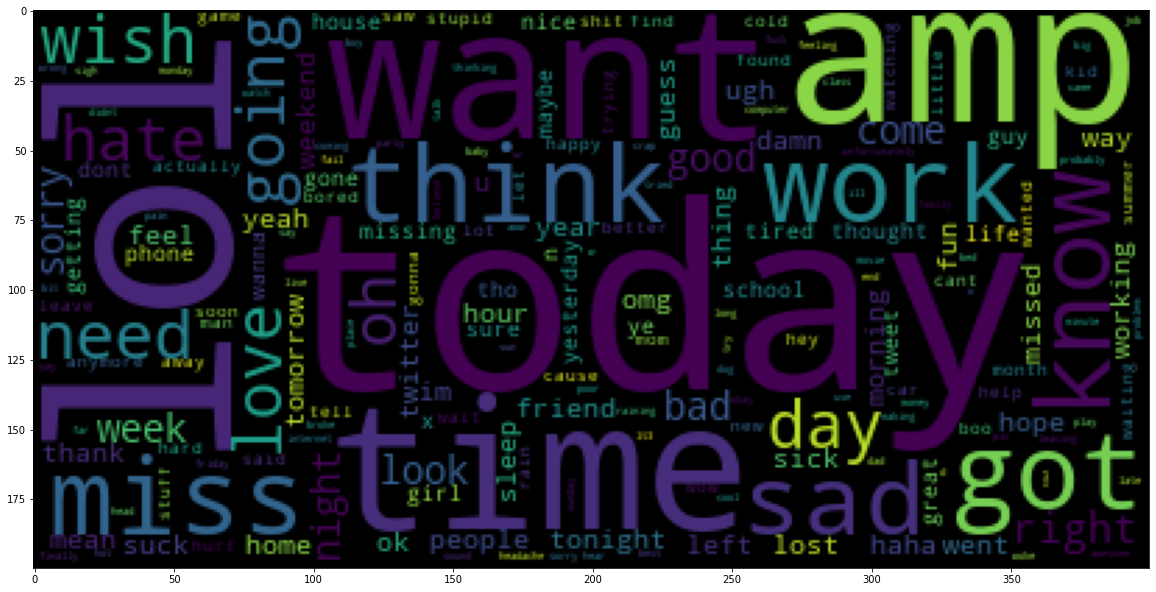

In [ ]:
sentences = DS1_new[DS1_new['sentiment'] == 0]['tweets'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [ ]:
import string
string.punctuation

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
DS1_new_countvectorizer = vectorizer.fit_transform(DS1_new['tweets'])

In [ ]:
DS1_new_countvectorizer.shape

(1600000, 771055)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DS1_new_countvectorizer, DS1_new['sentiment'],test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

(1200000, 771055)

In [ ]:
X_test.shape

(400000, 771055)

In [ ]:
y_train.shape

(1200000,)

In [ ]:
y_test.shape

(400000,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

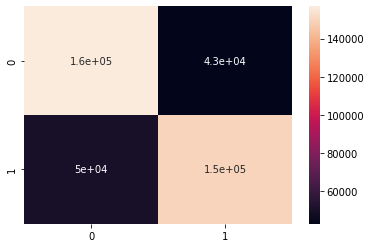

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77    199734
           4       0.78      0.75      0.76    200266

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

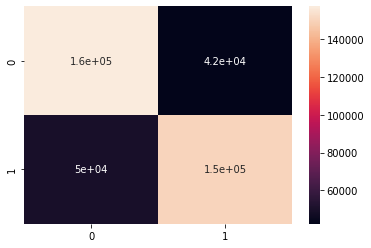

In [ ]:
y_predict_test = BNBmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77    199734
           4       0.78      0.75      0.77    200266

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C =2, max_iter=100, n_jobs=1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, n_jobs=1)

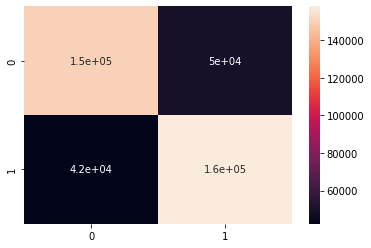

In [ ]:
y_predict_test = LRmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77    199734
           4       0.76      0.79      0.77    200266

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000



## Most common words

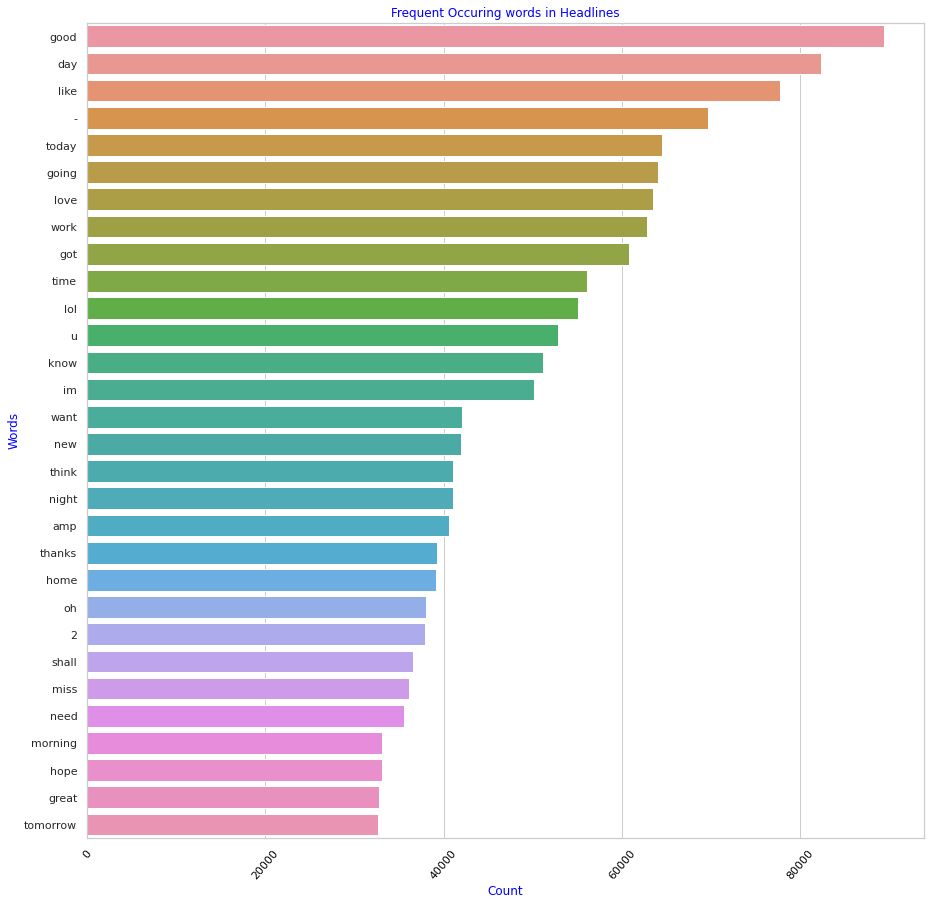

In [ ]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #vizualization result

text = DS1_new['tweets']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values

#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add a label to the axes.
plt.xlabel('Count', color="blue")  # Add a label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

## Feature Engineering

In [ ]:
columns=DS1_new.columns
columns

NameError: ignored

In [ ]:
DS1_new.drop([1,2,3,4],axis=1,inplace=True)
DS1_new.head()

In [ ]:
DS1_new.columns=['sentiment','data']
DS1_new.head()

In [ ]:
#denoting y with sentiment label
y=DS1_new['sentiment'] 

In [ ]:
#spliting dataset

from sklearn.model_selection import train_test_split
DS1_new_train,DS1_new_test,y_train,y_test=train_test_split(DS1_new['data'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',DS1_new_train.shape)
print('DF Test Shape: ',DS1_new_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

##Building deep learning model

In [ ]:
DS1_new_train = pd.read_csv('/content/gDrive/My Drive/Colab/Dissertation/SARCASTIC.csv',encoding='latin1',header=None)
DS1_new_test =pd.read_csv('/content/gDrive/My Drive/Colab/Dissertation/NON-SARCASTIC.csv',encoding='latin1',header=None)

FileNotFoundError: ignored

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(DS2_train)
sequence_train=tokenizer.texts_to_sequences(DS2_train)
sequence_test=tokenizer.texts_to_sequences(DS2_test)

NameError: ignored

In [ ]:
#word2vec tokenization

word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
DS2_train=pad_sequences(sequence_train)
DS2_train.shape

In [ ]:
T=DS2_train.shape[1]
DS2_test=pad_sequences(sequence_test,maxlen=T)
DS2_test.shape

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(DS2_train,y_train,validation_data=(DS2_test,y_test),epochs=5,batch_size=100)

In [ ]:
y_pred=model.predict(DS2_test)
y_pred

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(y_test,y_pred))

## Sarcasm Detection using CNN

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import drive

drive.mount('/content/gDrive/', force_remount=True)

In [ ]:
DS0=pd.read_csv('/content/gDrive/My Drive/Colab/Dissertation/training.1600000.processed.noemoticon.csv',encoding='latin1',header=None)

In [ ]:
#F1 score function

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
DS0.head()

In [ ]:
DS0.columns = ['target', 'id','date', 'flag', 'user', 'text']
DS0['target'] = DS0['target'].map({4:1, 0:0})
DS0 = DS0.drop(['date', 'id', 'flag', 'user'], axis=1)
DS0.head()

In [ ]:
temp1 = DS0['text'].apply(lambda x : len(x.split()))
print("Maximum length of a sentence:",max(temp1))
plt.hist(temp1, bins=max(temp1))
plt.title("Distribution of lengths of all the sentences")

In [ ]:
DS0['target'].value_counts().plot(kind='barh')
plt.title("Class Distribution")

In [ ]:
X = np.array(DS0['text'])
y = np.array(DS0['target'])

y = y.reshape((y.shape[0],1))
X = X.squeeze()

m = X.shape[0]
perm = np.random.permutation(m)
X = X[perm]
y = y[perm,:]

X = X[:60000]
y = y[:60000,:]

X_test = X[:10000]
y_test = y[:10000,:]

X_val = X[10000:20000]
y_val = y[10000:20000,:]

X_train = X[20000:]
y_train = y[20000:,:]

In [ ]:
max_len = min(max(len(x.split()) for x in X_train), 20)
embedding_size = 300
embedding_file = 'crawl-300d-2M.vec'
print("max length:",max_len)

In [ ]:
#adding tokens
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X))

X = tokenizer.texts_to_sequences(list(X_train))
X_train = np.array(pad_sequences(X, max_len))

X = tokenizer.texts_to_sequences(list(X_val))
X_val = np.array(pad_sequences(X, max_len))

X = tokenizer.texts_to_sequences(list(X_test))
X_test = np.array(pad_sequences(X, max_len))

print(y_train.shape, X_train.shape)
print(y_val.shape, X_val.shape)
print(y_test.shape, X_test.shape)

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("vocab:", vocab_size)

In [ ]:
#adding a crawl file of vectors-english or Pretrained embeddings
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip

In [ ]:
!unzip crawl-300d-2M.vec.zip

In [ ]:
def get_indices(word, *arr):
    return word,np.asarray(arr, dtype=np.float32)

word_to_vec = dict(get_indices(*i.rstrip().rsplit()) for i in open(embedding_file))

embedding_matrix_S = np.zeros((vocab_size, embedding_size))

for word,i in word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = word_to_vec.get(word)
    if embedding_vector is not None:
        embedding_matrix_S[i] = embedding_vector

In [ ]:
#model the data
def sentiment():
    vocab_size=68672
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Embedding(vocab_size, 
                                        embedding_size, 
                                        input_length=max_len, 
                                        weights=[embedding_matrix_S], 
                                        trainable=True,
                                        name='Embedding_S'))
    
    model.add(tf.keras.layers.Conv1D(filters=50,
                                     kernel_size=5,
                                     activation='relu',
                                     name='conv1_S'))
    model.add(tf.keras.layers.MaxPooling1D(2, name='max_pool1_S'))

    model.add(tf.keras.layers.Conv1D(filters=100,
                                     kernel_size=3,
                                     activation='relu',
                                     name='conv2_S'))
    model.add(tf.keras.layers.MaxPooling1D(2, name='max_pool2_S'))
    model.add(tf.keras.layers.Flatten(name='flatten1_S'))

    model.add(tf.keras.layers.Dense(100, activation='relu', name='dense1_S'))
    model.add(tf.keras.layers.Dropout(0.75, name='dropout1_S'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='output_S'))

    return model

In [ ]:
batch_size = 32
epochs = 3
learning_rate = 1e-5

model = sentiment()
checkpointer = ModelCheckpoint(filepath = "/content/gdrive/My Drive/sentiment.hdf5", 
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True,
                               mode='min')

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=['accuracy', f1_m])

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[checkpointer],
                    validation_data=(X_val,y_val))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = history.epoch

plt.plot(epoch,loss, label='loss')
plt.plot(epoch, val_loss, label='val loss')
plt.legend()
plt.title('epochs vs loss')
plt.show()

plt.plot(epoch,acc, label='accuracy')
plt.plot(epoch, val_acc, label='val accuracy')
plt.legend()
plt.title('epochs vs accuracy')
plt.show() 

In [ ]:
#test set performance
model.load_weights('/content/gdrive/My Drive/sentiment.hdf5')
results = model.evaluate(X_test,
                         y_test,
                         batch_size=batch_size
                         )

In [ ]:
print("Loss on test set:", results[0])
print("Accuracy on test set:", results[1])
print ("F1 score on test set:", results[2])

In [ ]:
def plot_roc(fpr,tpr,label= 'ROC curve'):
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
import sklearn
import sklearn.metrics
y_score = model.predict(X_test, batch_size=1024)
y_preds = model.predict(X_test, batch_size=1024).round().astype(int)

In [ ]:
import matplotlib.pyplot as plt   
import itertools
cm=sklearn.metrics.confusion_matrix(y_test, y_preds)
plot_confusion_matrix(cm,classes=['Non sarcastic','sarcastic'],title='Confusion Matrix')

In [ ]:
fpr, tpr, t = sklearn.metrics.roc_curve(y_test, y_score)
plot_roc(fpr, tpr,label='ROC curve ')

In [ ]:
print("Test accuracy score", sklearn.metrics.accuracy_score(y_test, y_preds))
print('Precision= ',sklearn.metrics.precision_score(y_test, y_preds))
print('Recall= ',sklearn.metrics.recall_score(y_test, y_preds))
print('F1 score= ',sklearn.metrics.f1_score(y_test, y_preds))
from sklearn.metrics import roc_auc_score
print('auc= ',roc_auc_score(y_test,y_score))

In [ ]:
S = sentiment()
S.load_weights('/content/gdrive/My Drive/sentiment.hdf5')

In [ ]:
## Sarcasm Model


## Rearranging and removing unnecessary columns

In [ ]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/gDrive/My Drive/Colab/Dissertation/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

negative word cloud

In [ ]:
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

positive word cloud 

In [ ]:
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

splitting dataset


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,test_size = 0.05, random_state = 0)
print(f'Data Split done.')

tf idf vector

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Transform data

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data is Transformed.')

In [ ]:
dataset.head()

In [ ]:
DS2=pd.read_csv('/content/gDrive/My Drive/Colab/Dissertation/training.1600000.processed.noemoticon.csv',encoding='latin1',header=None)
DS2.head()

In [ ]:
DS2.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
DS2.head()

In [ ]:
DS2 = DS2.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [ ]:
DS2.head()

#Sarcasm detection with CNN, RNN, LSTM, Bert

In [ ]:
#Using Preprocessed data
DS1_new.head()


,tweets,sentiment,length
0,switchfoot - awww bummer shoulda got david car...,0,53
1,upset update facebook texting cry result schoo...,0,58
2,kenichan dived times ball managed save 50 rest...,0,53
3,body feels itchy like fire,0,26
4,nationwideclass behaving mad,0,28


In [ ]:
#shuffle data to split into train, test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DS1_new['tweets'], DS1_new['sentiment'], train_size = 0.8, random_state = 42, shuffle = True)

In [ ]:
DS1_new.shape
train_dataframe = DS1_new[0:20000]
test_dataframe = DS1_new[20000:]

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1280000
1280000
320000
320000


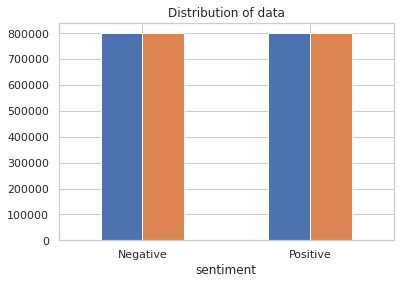

In [ ]:
ax = DS1_new.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax = ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [ ]:
#tokenize text
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 100
training_size = 80000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_padded, training_labels, epochs=3, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/3
40000/40000 - 148s - loss: -2.4861e+06 - accuracy: 6.2500e-05 - val_loss: -9.1121e+06 - val_accuracy: 0.0000e+00 - 148s/epoch - 4ms/step
Epoch 2/3
40000/40000 - 155s - loss: -2.9826e+07 - accuracy: 0.0000e+00 - val_loss: -6.1241e+07 - val_accuracy: 0.0000e+00 - 155s/epoch - 4ms/step
Epoch 3/3
40000/40000 - 191s - loss: -1.1774e+08 - accuracy: 0.0000e+00 - val_loss: -1.9227e+08 - val_accuracy: 0.0000e+00 - 191s/epoch - 5ms/step


In [ ]:
#CNN Model
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history1 = model1.fit(training_padded, training_labels, epochs=2, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/2
40000/40000 - 557s - loss: -6.8741e+10 - accuracy: 1.6406e-05 - val_loss: -3.0545e+11 - val_accuracy: 0.0000e+00 - 557s/epoch - 14ms/step
Epoch 2/2
40000/40000 - 516s - loss: -1.4965e+12 - accuracy: 0.0000e+00 - val_loss: -3.6218e+12 - val_accuracy: 0.0000e+00 - 516s/epoch - 13ms/step


In [ ]:
#LSTM model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(training_padded, training_labels, epochs=2, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/2
40000/40000 - 1457s - loss: -6.1583e+05 - accuracy: 0.0145 - val_loss: -1.7789e+06 - val_accuracy: 0.0344 - 1457s/epoch - 36ms/step
Epoch 2/2
40000/40000 - 1454s - loss: -3.9591e+06 - accuracy: 0.0327 - val_loss: -6.7215e+06 - val_accuracy: 0.0324 - 1454s/epoch - 36ms/step


In [ ]:
#RNN Model
# encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=vocab_size)
# encoder.adapt((datastore['headline']).map(lambda text, label: text))
model3 = tf.keras.Sequential([
    #encoder,
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])
history3 = model3.fit(training_padded, training_labels, epochs=2, validation_data=(testing_padded, testing_labels), verbose=2, validation_steps=30)

Epoch 1/2
40000/40000 - 4950s - loss: -1.3777e+04 - accuracy: 0.0959 - val_loss: -3.9613e+04 - val_accuracy: 0.1452 - 4950s/epoch - 124ms/step
Epoch 2/2
40000/40000 - 4792s - loss: -8.7880e+04 - accuracy: 0.1450 - val_loss: -1.4798e+05 - val_accuracy: 0.1912 - 4792s/epoch - 120ms/step


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 12.3 MB/s 
     |████████████████████████████████| 6.6 MB 50.2 MB/s 
     |████████████████████████████████| 120 kB 63.9 MB/s 


In [ ]:
import pandas as pd
from pandas import DataFrame
accuracy = [max(history1.history['val_accuracy']),max(history2.history['val_accuracy']), max(history3.history['val_accuracy'])]
loss = [max(history1.history['val_loss']),max(history2.history['val_loss']),max(history3.history['val_loss'])]

col={'Accuracy':accuracy,'Loss':loss}
models=['NN','CNN','LSTM']
graph_df=DataFrame(data=col,index=models)
graph_df

,Accuracy,Loss
NN,0.000000,-3.054490e+11
CNN,0.034369,-1.778917e+06
LSTM,0.191250,-3.961294e+04


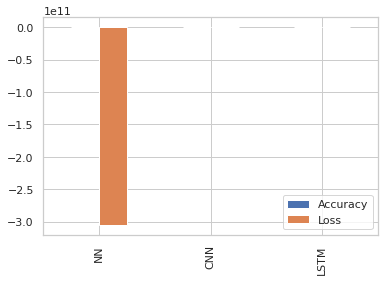

In [ ]:
graph_df.plot(kind='bar')